In [7]:
import numpy as np             # numpy is a general-purpose math package
import yt                       # yt is the data vizualization package
from yt.units import *          # this lets you get things like speed of light in proper units just by typing 'c'
from astropy.table import Table # this is needed for reading in various foggie data byproducts
from astropy.io import ascii    # this too
import matplotlib.pyplot as plt # this is the standard python plotting package, very useful!
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import math

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.foggie_load import *

foggie_dir = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
# code_path should be the path to the directory where you've cloned the github repo.
code_path = "/Users/hylee/coding/foggie/foggie/"
# Finally, this is the name of the simulation output.

foggie_dir_output = "/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/"

foggie_sim = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
github_dir = "/Users/hylee/coding/foggie/foggie/" 
snap = "RD0020"
foggie_output = '/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/'
track_dir = github_dir + 'halo_infos/008508/nref11c_nref9f/'
track_name = github_dir + 'halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
snap_name = foggie_sim + snap + '/' + snap

In [8]:
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=track_dir + 'halo_c_v',
                             disk_relative=False, do_filter_particles=False, masses_dir=track_dir)

yt : [INFO     ] 2023-06-28 13:38:23,919 Parameters: current_time              = 154.80103271343
yt : [INFO     ] 2023-06-28 13:38:23,919 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-06-28 13:38:23,920 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-28 13:38:23,921 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-28 13:38:23,921 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-28 13:38:23,922 Parameters: current_redshift          = 1.9999996880027
yt : [INFO     ] 2023-06-28 13:38:23,923 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-06-28 13:38:23,923 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-06-28 13:38:23,924 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-06-28 13:38:23,924 Parameters: hubble_constant           = 0.695


Opening snapshot /Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/RD0020/RD0020
get_refine_box: using this location:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.99979384142 0.493035 0.487894 0.501194 0.495035 0.489894 0.503194    9


Parsing Hierarchy : 100%|█████████████████| 7348/7348 [00:00<00:00, 8052.59it/s]
yt : [INFO     ] 2023-06-28 13:38:25,097 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file


In [9]:
matplotlib.use("Agg")

size = 30 #FRB was restricting everything inside a box with a length of 10 kpc. 
xres = 70
yres = 70
axis_x= "x"
axis_y = "y"
axis_z = "z"

projx = ds.proj(("gas", "density"), axis_x , center = ds.halo_center_kpc, 
                data_source = refine_box, weight_field = "density")

projy = ds.proj(("gas", "density"), axis_y , center = ds.halo_center_kpc, 
              data_source = refine_box, weight_field = "density")

projz = ds.proj(("gas", "density"), axis_z , center = ds.halo_center_kpc, 
              data_source = refine_box, weight_field = "density")

width = (size, "kpc")  

res = [xres,yres] 

frbx = projx.to_frb(width, res, center = ds.halo_center_kpc)

frby = projy.to_frb(width, res, center = ds.halo_center_kpc)

frbz = projz.to_frb(width, res, center = ds.halo_center_kpc)


yt : [INFO     ] 2023-06-28 13:38:45,810 Projection completed


In [10]:
%matplotlib inline

fontsize = 15


def projection(frb):
    fig, ax = plt.subplots()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax.imshow(np.log10(np.array(frb["gas","density"])), 
                   cmap='viridis', extent = [-size/2, size/2, -size/2, size/2])
    
    fig.colorbar(im, cax=cax, orientation='vertical')

    cbar = fig.colorbar(im, cax=cax, orientation='vertical')

    cbar.ax.tick_params(labelsize = 15) 

    cbar.set_label('Density [log g/cm^3]') #=> change this to density & increase the fontsize 

    #ax.set_title("Metallicity plot of Tempest RD0042")
    ax.set_xlabel('Distance in y axis from center [kpc]', fontsize=fontsize)
    ax.set_ylabel('Distance in z axis from center [kpc]', fontsize=fontsize)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    return cbar, im

yt : [INFO     ] 2023-06-28 13:38:59,509 Making a fixed resolution buffer of (('gas', 'density')) 70 by 70


(<matplotlib.colorbar.Colorbar at 0x7fa7f2e28cd0>,
 <matplotlib.image.AxesImage at 0x7fa7f2e28ac0>)

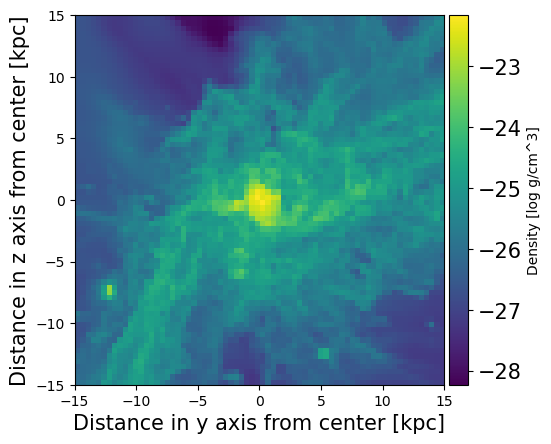

In [11]:
projection(frbx)

(<matplotlib.colorbar.Colorbar at 0x7fa804111d80>,
 <matplotlib.image.AxesImage at 0x7fa8431aa140>)

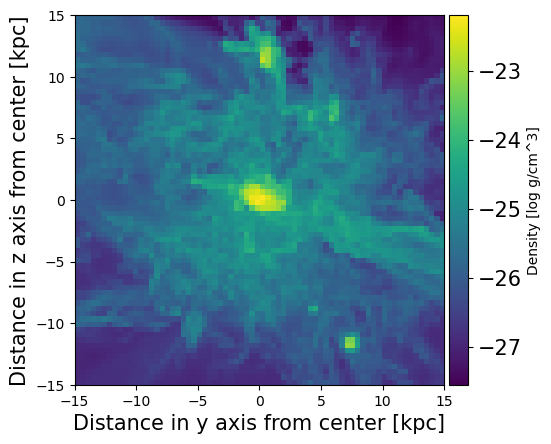

In [12]:
projection(frby)

(<matplotlib.colorbar.Colorbar at 0x7fa8041bb8b0>,
 <matplotlib.image.AxesImage at 0x7fa8347b3400>)

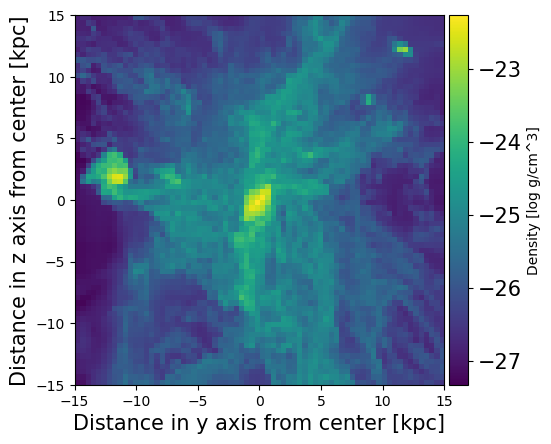

In [13]:
projection(frbz)

yt : [INFO     ] 2023-06-28 13:39:10,103 xlim = 0.487894 0.489894
yt : [INFO     ] 2023-06-28 13:39:10,105 ylim = 0.501194 0.503194
yt : [INFO     ] 2023-06-28 13:39:10,107 xlim = 0.487912 0.489912
yt : [INFO     ] 2023-06-28 13:39:10,107 ylim = 0.501196 0.503196
yt : [INFO     ] 2023-06-28 13:39:10,109 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



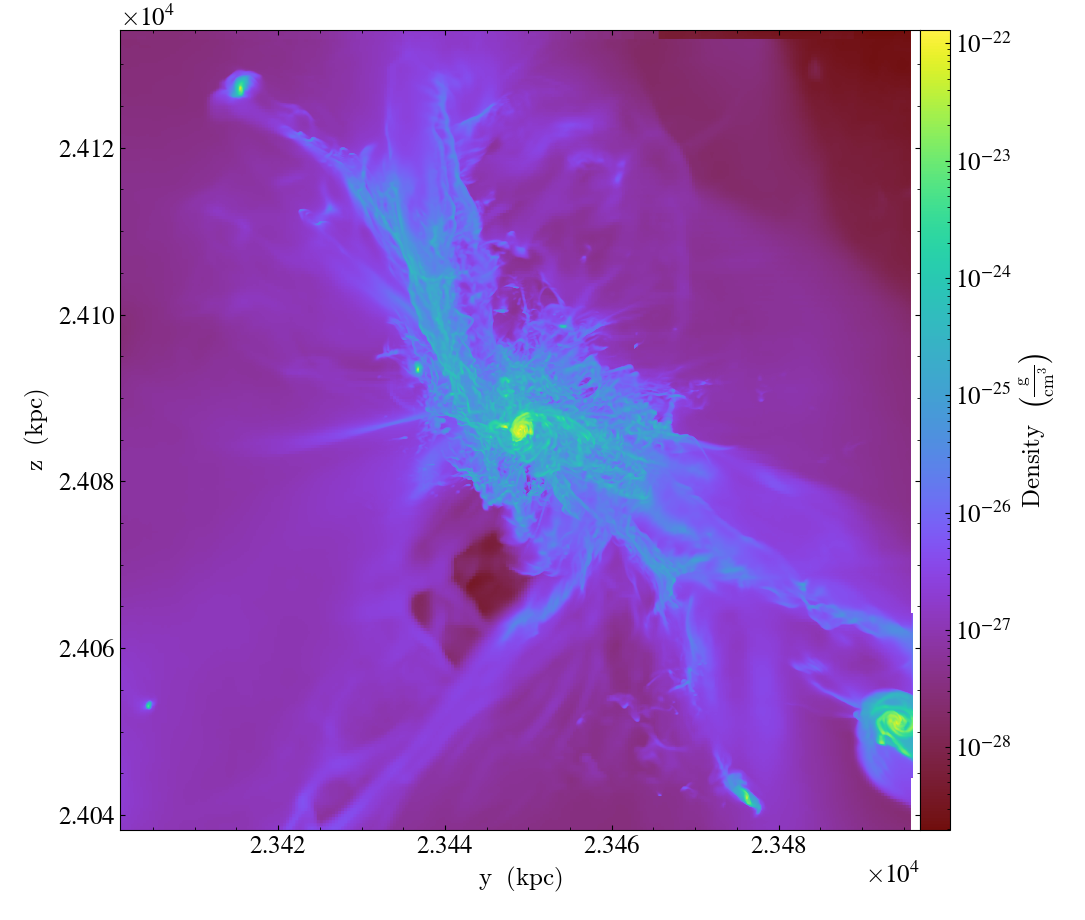

In [14]:
projx.plot()
plt.show()